<a href="https://colab.research.google.com/github/MonicadeAraujo/DataWise-Forecast/blob/main/MODELO_CARROS_VENDIDOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import shapiro

df = pd.read_csv('/content/Vendas_Carros_Corrigido (1).csv')
df.head()

,Carros_Vendidos,Preco_Carro,Idade_Comprador,Renda_Comprador,Taxa_Juros,Num_Test_Drives,Modelo_Popularidade,Renda_Variavel,Custo_Financiamento,Idade_Outlier,Historico_Compras,Test_Drives_Sequenciais,Num_Comerciais
0,4487.860706,43618.616627,70,8140.862986,0.081206,3,9.974165,20477.096583,3796.419591,70,1,2.133146,10
1,16680.992055,146937.971332,68,12074.675016,0.094508,0,3.358249,9645.925182,13791.993321,68,0,4.286623,1
2,5906.076095,117448.156020,69,19385.623130,0.045248,0,3.638352,35388.110414,4859.240161,69,2,6.385168,12
3,10123.564626,72176.136707,67,14257.869807,0.112815,4,8.874462,29884.622988,8263.253442,67,1,7.066456,14
4,15867.663634,114912.616591,21,4550.612871,0.116781,3,3.264510,18006.267671,13008.592749,21,1,6.866401,1


In [ ]:
df.describe()

,Carros_Vendidos,Preco_Carro,Idade_Comprador,Renda_Comprador,Taxa_Juros,Num_Test_Drives,Modelo_Popularidade,Renda_Variavel,Custo_Financiamento,Idade_Outlier,Historico_Compras,Test_Drives_Sequenciais,Num_Comerciais
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,9753.456683,91202.579687,45.800000,10640.747560,0.086937,1.913333,5.680845,20135.594747,8047.749451,47.173333,1.880000,5.620586,9.346667
std,5810.590161,34177.285393,17.350319,4982.207794,0.037112,1.487923,2.463187,11258.620847,4835.658830,19.613975,1.186727,3.543735,5.780071
min,721.799720,30401.910828,18.000000,2034.464429,0.021002,0.000000,1.018479,2007.313058,588.526127,18.000000,0.000000,-4.214973,0.000000
25%,5155.275470,63016.888245,31.000000,6978.408533,0.055533,0.250000,3.474461,10075.185153,4214.826645,31.250000,1.000000,3.142806,5.000000
50%,9083.165196,93098.931415,43.000000,10628.515842,0.089302,2.000000,5.816484,19706.985265,7409.697327,43.000000,2.000000,6.278723,9.000000
75%,13279.441066,120542.915791,63.000000,14231.761060,0.116752,3.000000,7.787300,29463.737018,10996.601028,64.000000,3.000000,8.224045,14.750000
max,24358.213124,147949.022711,74.000000,19978.987183,0.148288,4.000000,9.974165,39957.029974,20148.342724,146.000000,5.000000,12.433912,19.000000


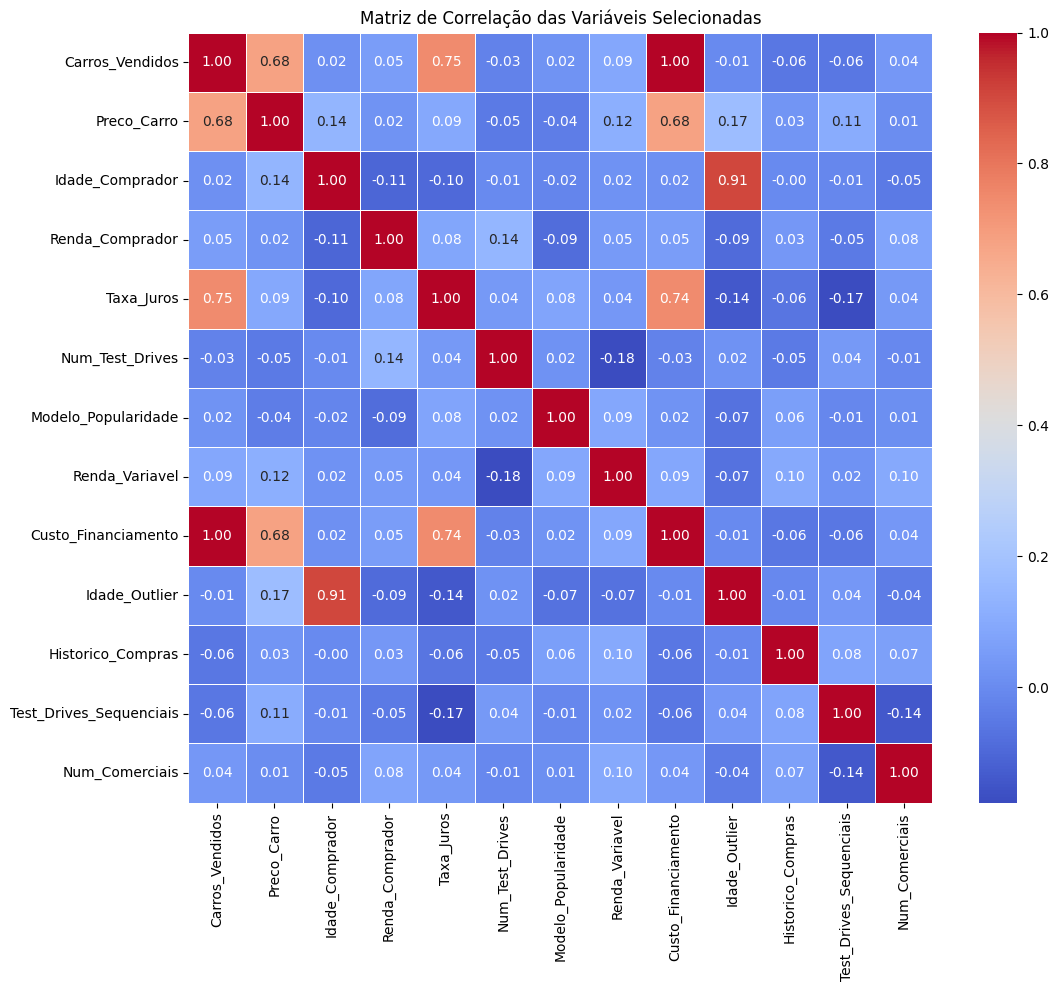

In [ ]:
# Lista das colunas desejadas
colunas_desejadas = [
    "Carros_Vendidos", "Preco_Carro", "Idade_Comprador", "Renda_Comprador",
    "Taxa_Juros", "Num_Test_Drives", "Modelo_Popularidade", "Renda_Variavel",
    "Custo_Financiamento", "Idade_Outlier", "Historico_Compras",
    "Test_Drives_Sequenciais", "Num_Comerciais"
]

# Filtra o dataframe para considerar apenas essas colunas
df = df[colunas_desejadas]

# Calcula a matriz de correlação
correlation_matrix = df.corr()

# Configura o gráfico
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Define o título
plt.title("Matriz de Correlação das Variáveis Selecionadas")

# Exibe o gráfico
plt.show()


In [ ]:
# Definir a variável dependente
variavel_dependente = "Carros_Vendidos"

# Ordenar a matriz de correlação em relação à variável dependente
correlacoes = correlation_matrix[variavel_dependente].sort_values(ascending=False)

# Exibir as correlações ordenadas
print(correlacoes)


Carros_Vendidos            1.000000
Custo_Financiamento        0.999763
Taxa_Juros                 0.745153
Preco_Carro                0.678832
Renda_Variavel             0.088476
Renda_Comprador            0.053606
Num_Comerciais             0.039129
Modelo_Popularidade        0.023856
Idade_Comprador            0.016062
Idade_Outlier             -0.005445
Num_Test_Drives           -0.025695
Test_Drives_Sequenciais   -0.059263
Historico_Compras         -0.059768
Name: Carros_Vendidos, dtype: float64


# Verificando a autocorrelação dos resíduos
< 2 → Tendência de autocorrelação positiva

In [ ]:
# Definindo a variável dependente e as variáveis independentes
target = "Carros_Vendidos"
X = df.drop(columns=[target])  # Variáveis preditoras
y = df[target]  # Variável dependente

# Ajustando o modelo de regressão linear
X_const = sm.add_constant(X)  # Adicionando intercepto
modelo = sm.OLS(y, X_const).fit()

# Calculando o teste de Durbin-Watson para independência dos erros
dw_stat = durbin_watson(modelo.resid)

# Exibindo o resultado
print(f"Estatística de Durbin-Watson: {dw_stat:.4f}")

# Interpretação do teste de Durbin-Watson
if dw_stat < 1.5:
    print("Indício forte de autocorrelação positiva nos resíduos.")
elif dw_stat > 2.5:
    print("Indício forte de autocorrelação negativa nos resíduos.")
else:
    print("Não há evidências fortes de autocorrelação nos resíduos.")

Estatística de Durbin-Watson: 2.1236
Não há evidências fortes de autocorrelação nos resíduos.


# Verificando os erros do modelo (resíduos) - têm variância constante?
 p < 0.05, rejeitamos H0 → os resíduos não têm variância constante (heterocedasticidade)



In [ ]:
# Calculando o teste de Breusch-Pagan para homocedasticidade
bp_test = het_breuschpagan(modelo.resid, X_const)

# Extraindo o p-valor do teste
p_value_bp = bp_test[1]

# Exibindo os resultados
print(f"Teste de Breusch-Pagan: p-valor = {p_value_bp:.5f}")

# Interpretando o resultado
if p_value_bp < 0.05:
    print("O modelo apresenta heterocedasticidade significativa (variância dos erros não é constante).")
else:
    print("Não há evidências fortes de heterocedasticidade (variância dos erros é aproximadamente constante).")

Teste de Breusch-Pagan: p-valor = 0.00577
O modelo apresenta heterocedasticidade significativa (variância dos erros não é constante).


# Um padrão em forma de funil: Os resíduos aumentam ou diminuem sistematicamente conforme o valor predito aumenta → resultado que o modelo estima para a variável dependente (Carros_Vendidos)




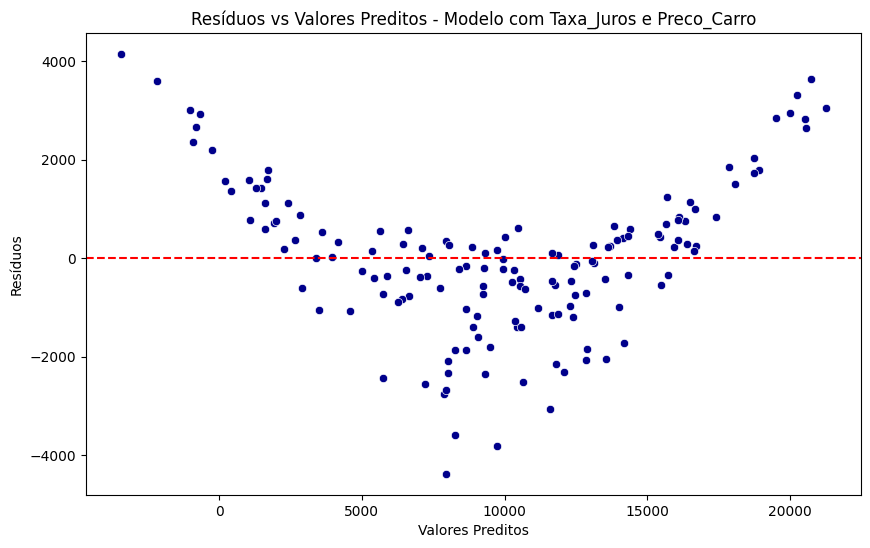

In [ ]:
# Gráfico: Resíduos vs Valores Preditos

residuos_modelo1 = modelo1.resid

valores_preditos = modelo1.fittedvalues
residuos = modelo1.resid

plt.figure(figsize=(10, 6))
sns.scatterplot(x=valores_preditos, y=residuos, color='darkblue', edgecolor='white')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Preditos - Modelo com Taxa_Juros e Preco_Carro")
plt.show()


In [ ]:
def testar_heterocedasticidade_removendo(df, target, variavel_removida):

    X = df.drop(columns=[target])  # Variáveis regressoras
    y = df[target]  # Variável de interesse

    # Modelo completo
    X_const = sm.add_constant(X)
    modelo_completo = sm.OLS(y, X_const).fit()
    p_value_completo = het_breuschpagan(modelo_completo.resid, X_const)[1]

    # Modelo sem a variável especificada
    if variavel_removida not in X.columns:
        return {"Erro": f"A variável '{variavel_removida}' não está no dataset."}

    X_reduzido = X.drop(columns=[variavel_removida])
    X_reduzido_const = sm.add_constant(X_reduzido)
    modelo_reduzido = sm.OLS(y, X_reduzido_const).fit()
    p_value_reduzido = het_breuschpagan(modelo_reduzido.resid, X_reduzido_const)[1]

    return {
        "p-valor (Modelo Completo)": p_value_completo,
        f"p-valor (Sem variável removida '{variavel_removida}')": p_value_reduzido,
        "Conclusão": "Removendo a variável resolve o problema" if p_value_reduzido > 0.05 else "Ainda há heterocedasticidade"
    }

for var in df.drop(columns=[target]).columns:
  # Testando a função removendo a variável "Frete_Pago"
  resultado_teste = testar_heterocedasticidade_removendo(df, "Carros_Vendidos", var)
  print(resultado_teste)

{'p-valor (Modelo Completo)': np.float64(0.0057713720303933765), "p-valor (Sem variável removida 'Preco_Carro')": np.float64(0.00404883612403881), 'Conclusão': 'Ainda há heterocedasticidade'}
{'p-valor (Modelo Completo)': np.float64(0.0057713720303933765), "p-valor (Sem variável removida 'Idade_Comprador')": np.float64(0.005465320023996484), 'Conclusão': 'Ainda há heterocedasticidade'}
{'p-valor (Modelo Completo)': np.float64(0.0057713720303933765), "p-valor (Sem variável removida 'Renda_Comprador')": np.float64(0.030496841993625543), 'Conclusão': 'Ainda há heterocedasticidade'}
{'p-valor (Modelo Completo)': np.float64(0.0057713720303933765), "p-valor (Sem variável removida 'Taxa_Juros')": np.float64(0.0037103552766198818), 'Conclusão': 'Ainda há heterocedasticidade'}
{'p-valor (Modelo Completo)': np.float64(0.0057713720303933765), "p-valor (Sem variável removida 'Num_Test_Drives')": np.float64(0.0034323333912647186), 'Conclusão': 'Ainda há heterocedasticidade'}
{'p-valor (Modelo Compl

In [ ]:
# Definindo a variável dependente e as variáveis independentes
target = "Carros_Vendidos"
X = df.drop(columns=[target])  # Variáveis preditoras
y = df[target]  # Variável dependente

# Ajustando o modelo de regressão linear
X_const = sm.add_constant(X)
modelo = sm.OLS(y, X_const).fit()

# Teste de normalidade de Shapiro-Wilk nos resíduos do modelo
shapiro_test = shapiro(modelo.resid)

# Extraindo o p-valor do teste
p_value_shapiro = shapiro_test[1]

# Exibindo os resultados
print(f"Teste de Shapiro-Wilk: p-valor = {p_value_shapiro:.5f}")

# Interpretando o resultado
if p_value_shapiro < 0.05:
    print("Os resíduos não seguem uma distribuição normal.")
else:
    print("Os resíduos seguem uma distribuição aproximadamente normal.")

Teste de Shapiro-Wilk: p-valor = 0.79167
Os resíduos seguem uma distribuição aproximadamente normal.


In [ ]:
def testar_normalidade_removendo(df, target):

    X = df.drop(columns=[target])  # Variáveis preditoras
    y = df[target]  # Variável dependente

    resultados = {}

    # Modelo completo
    X_const = sm.add_constant(X)
    modelo_completo = sm.OLS(y, X_const).fit()
    p_value_completo = shapiro(modelo_completo.resid)[1]

    # Testando a remoção de cada variável
    for var in X.columns:
        X_reduzido = X.drop(columns=[var])  # Removendo uma variável
        X_reduzido_const = sm.add_constant(X_reduzido)
        modelo_reduzido = sm.OLS(y, X_reduzido_const).fit()
        p_value_reduzido = shapiro(modelo_reduzido.resid)[1]

        resultados[var] = p_value_reduzido

    return p_value_completo, resultados

# Rodando o teste de normalidade retirando variáveis
p_valor_inicial, resultados_remocao = testar_normalidade_removendo(df, "Carros_Vendidos")

# Exibindo os resultados
print(f"Teste de Shapiro-Wilk (Modelo Completo): p-valor = {p_valor_inicial:.5f}")

for var, p_valor in resultados_remocao.items():
    status = "Removendo essa variável resolve o problema" if p_valor > 0.05 else "Ainda há falta de normalidade"
    print(f"Removendo {var}: p-valor = {p_valor:.5f} → {status}")


Teste de Shapiro-Wilk (Modelo Completo): p-valor = 0.79167
Removendo Preco_Carro: p-valor = 0.77799 → Removendo essa variável resolve o problema
Removendo Idade_Comprador: p-valor = 0.88482 → Removendo essa variável resolve o problema
Removendo Renda_Comprador: p-valor = 0.70182 → Removendo essa variável resolve o problema
Removendo Taxa_Juros: p-valor = 0.72287 → Removendo essa variável resolve o problema
Removendo Num_Test_Drives: p-valor = 0.73464 → Removendo essa variável resolve o problema
Removendo Modelo_Popularidade: p-valor = 0.78936 → Removendo essa variável resolve o problema
Removendo Renda_Variavel: p-valor = 0.36780 → Removendo essa variável resolve o problema
Removendo Custo_Financiamento: p-valor = 0.29565 → Removendo essa variável resolve o problema
Removendo Idade_Outlier: p-valor = 0.91601 → Removendo essa variável resolve o problema
Removendo Historico_Compras: p-valor = 0.74424 → Removendo essa variável resolve o problema
Removendo Test_Drives_Sequenciais: p-valor 

In [ ]:
# Criando a matriz de variáveis independentes (sem a variável dependente)
X = df.drop(columns=["Carros_Vendidos"])
X_const = sm.add_constant(X)  # Adicionando o intercepto

# Calculando o VIF para cada variável
vif_values = {X.columns[i]: variance_inflation_factor(X_const.values, i + 1) for i in range(len(X.columns))}

# Exibindo os resultados
print("Variância Inflation Factor (VIF) para cada variável:")
for var, vif in vif_values.items():
    status = "Possível multicolinearidade" if vif > 10 else "OK"
    print(f"{var}: VIF = {vif:.2f} → {status}")

Variância Inflation Factor (VIF) para cada variável:
Preco_Carro: VIF = 6.80 → OK
Idade_Comprador: VIF = 6.07 → OK
Renda_Comprador: VIF = 1.07 → OK
Taxa_Juros: VIF = 8.04 → OK
Num_Test_Drives: VIF = 1.08 → OK
Modelo_Popularidade: VIF = 1.05 → OK
Renda_Variavel: VIF = 1.13 → OK
Custo_Financiamento: VIF = 14.84 → Possível multicolinearidade
Idade_Outlier: VIF = 6.25 → OK
Historico_Compras: VIF = 1.05 → OK
Test_Drives_Sequenciais: VIF = 1.09 → OK
Num_Comerciais: VIF = 1.05 → OK


In [ ]:
# Novo dataframe sem uma variável (removendo 'Custo_Financiamento')
X_novo = df[["Taxa_Juros", "Preco_Carro"]]

# Calcular o VIF novamente
vif_dados = pd.DataFrame()
vif_dados["Variável"] = X_novo.columns
vif_dados["VIF"] = [variance_inflation_factor(X_novo.values, i) for i in range(X_novo.shape[1])]

print(vif_dados)

      Variável     VIF
0   Taxa_Juros  4.2577
1  Preco_Carro  4.2577


Comparação entre as variavies mais correlacionadas com a variavel de interesse → Carros Vendidos

In [ ]:
# Definindo a variável dependente e a variável independente escolhida
target = "Carros_Vendidos"
X_final = df[["Taxa_Juros","Preco_Carro", "Custo_Financiamento"]]  # Apenas a variável relevante
vif_values = {X_final.columns[i]: variance_inflation_factor(X_const.values, i + 1) for i in range(len(X_final.columns))}
print(vif_values)

y = df[target]

# Adicionando o intercepto
X_final_const = sm.add_constant(X_final)

# Ajustando o modelo final
modelo_final = sm.OLS(y, X_final_const).fit()

bp_test = het_breuschpagan(modelo_final.resid, X_final_const)
p_value_bp = bp_test[1]
print(f"Teste de Breusch-Pagan: p-valor = {p_value_bp:.5f}")

p_value_completo = shapiro(modelo_final.resid)[1]
print(f"Shapiro: p-valor = {p_value_completo:.5f}")

# Exibindo o R² ajustado do modelo final
r2_ajustado_final = modelo_final.rsquared_adj
print(f"R² Ajustado do modelo final: {r2_ajustado_final:.5f}")

# Exibindo o resumo completo do modelo
print(modelo_final.summary())

{'Taxa_Juros': np.float64(6.801093799043989), 'Preco_Carro': np.float64(6.0717332679529745), 'Custo_Financiamento': np.float64(1.0667506905810886)}
Teste de Breusch-Pagan: p-valor = 0.71594
Shapiro: p-valor = 0.54848
R² Ajustado do modelo final: 0.99952
                            OLS Regression Results                            
Dep. Variable:        Carros_Vendidos   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.033e+05
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          1.33e-242
Time:                        12:31:58   Log-Likelihood:                -937.92
No. Observations:                 150   AIC:                             1884.
Df Residuals:                     146   BIC:                             1896.
Df Model:                           3                                         
Covariance Type:            nonrobu

In [ ]:
# Definindo a variável dependente e a variável independente escolhida
target = "Carros_Vendidos"
X_final = df[["Taxa_Juros","Preco_Carro"]]  # Apenas a variável relevante
vif_values = {X_final.columns[i]: variance_inflation_factor(X_const.values, i + 1) for i in range(len(X_final.columns))}
print(vif_values)

y = df[target]

# Adicionando o intercepto
X_final_const = sm.add_constant(X_final)

# Ajustando o modelo final
modelo_final = sm.OLS(y, X_final_const).fit()

bp_test = het_breuschpagan(modelo_final.resid, X_final_const)
p_value_bp = bp_test[1]
print(f"Teste de Breusch-Pagan: p-valor = {p_value_bp:.5f}")

p_value_completo = shapiro(modelo_final.resid)[1]
print(f"Shapiro: p-valor = {p_value_completo:.5f}")

# Exibindo o R² ajustado do modelo final
r2_ajustado_final = modelo_final.rsquared_adj
print(f"R² Ajustado do modelo final : {r2_ajustado_final:.5f}")

# Exibindo o resumo completo do modelo
print(modelo_final.summary())

{'Taxa_Juros': np.float64(6.801093799043989), 'Preco_Carro': np.float64(6.0717332679529745)}
Teste de Breusch-Pagan: p-valor = 0.86294
Shapiro: p-valor = 0.10772
R² Ajustado do modelo final : 0.92931
                            OLS Regression Results                            
Dep. Variable:        Carros_Vendidos   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     980.3
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           9.95e-86
Time:                        12:31:58   Log-Likelihood:                -1312.7
No. Observations:                 150   AIC:                             2631.
Df Residuals:                     147   BIC:                             2641.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
          

Concluimos que, como a variavel Custo_Financiamento é quase perfeitamente correlacionada com Carros_Vendidos (0.999763). Isso significa que, no seu conjunto de dados atual, basta essa variável sozinha para prever com muita precisão o alvo, mas pode falhar fora do modelo. Por isso, um melhor caminho de escolha são as outras duas variaveis Taxa_Juros, Preco_Carro, que também estão fortemente correlacionadas a variavel de interesse que deixam o modelo mais adequado.

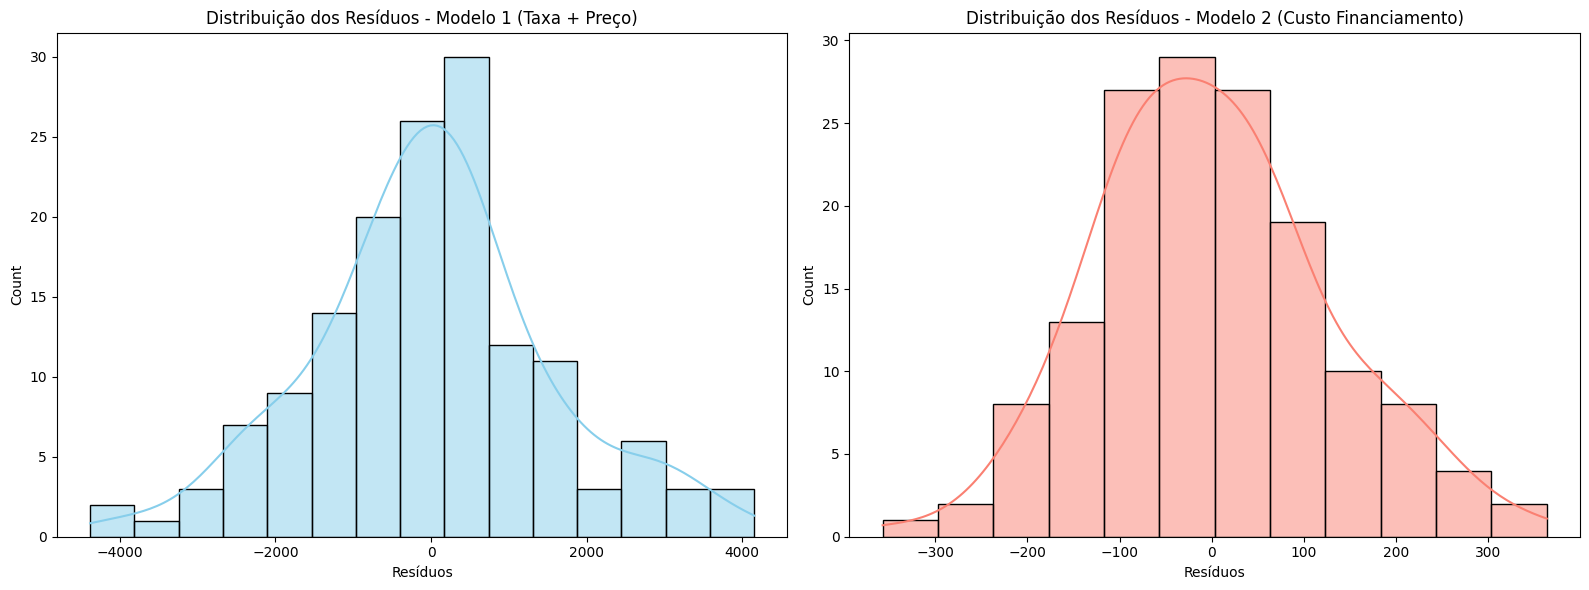

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo 1: Usando Taxa_Juros e Preco_Carro
X1 = df[['Taxa_Juros', 'Preco_Carro']]
X1 = sm.add_constant(X1)  # Adiciona intercepto
modelo1 = sm.OLS(y, X1).fit()

# Modelo 2: Usando apenas Custo_Financiamento
X2 = df[['Custo_Financiamento']]
X2 = sm.add_constant(X2)
modelo2 = sm.OLS(y, X2).fit()

# Gerar resíduos de cada modelo
residuos_modelo1 = modelo1.resid
residuos_modelo2 = modelo2.resid

# Plotar resíduos dos dois modelos
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Resíduos Modelo 1
sns.histplot(residuos_modelo1, kde=True, ax=axs[0], color="skyblue")
axs[0].set_title("Distribuição dos Resíduos - Modelo 1 (Taxa + Preço)")
axs[0].set_xlabel("Resíduos")

# Resíduos Modelo 2
sns.histplot(residuos_modelo2, kde=True, ax=axs[1], color="salmon")
axs[1].set_title("Distribuição dos Resíduos - Modelo 2 (Custo Financiamento)")
axs[1].set_xlabel("Resíduos")

plt.tight_layout()
plt.show()

In [ ]:
# Função para remover outliers de todas as colunas usando o método IQR
def remover_outliers_iqr(df):
    df_filtrado = df.copy()
    for col in df_filtrado.columns:
        Q1 = df_filtrado[col].quantile(0.25)
        Q3 = df_filtrado[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definindo limites para outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrando os valores dentro dos limites
        df_filtrado = df_filtrado[(df_filtrado[col] >= limite_inferior) & (df_filtrado[col] <= limite_superior)]

    return df_filtrado

# Aplicando a função para remover outliers de todas as colunas
df_sem_outliers = remover_outliers_iqr(df)
df_sem_outliers.shape

(149, 13)

In [ ]:
def testar_impacto_remocao(df, target, variaveis_removidas):
    """
    Testa se a remoção de variáveis do modelo aumenta ou diminui o erro (MSE).

    Parâmetros:
    df (pd.DataFrame): O dataframe contendo os dados.
    target (str): A variável dependente do modelo.
    variaveis_removidas (list): Lista de variáveis a serem removidas do modelo.

    Retorna:
    dict: Contendo o erro quadrático médio (MSE) do modelo completo e reduzido, e a variação.
    """
    X = df.drop(columns=[target])  # Variáveis preditoras
    y = df[target]  # Variável dependente

    # Modelo completo
    X_completo_const = sm.add_constant(X)
    modelo_completo = sm.OLS(y, X_completo_const).fit()
    mse_completo = ((modelo_completo.resid) ** 2).mean()

    # Modelo reduzido (removendo as variáveis especificadas)
    X_reduzido = X.drop(columns=variaveis_removidas)
    X_reduzido_const = sm.add_constant(X_reduzido)
    modelo_reduzido = sm.OLS(y, X_reduzido_const).fit()
    mse_reduzido = ((modelo_reduzido.resid) ** 2).mean()

    # Comparação dos erros
    variacao_erro = mse_reduzido - mse_completo

    return {
        "MSE Modelo Completo": mse_completo,
        "MSE Modelo Reduzido": mse_reduzido,
        "Variação no Erro": variacao_erro,
        "Conclusão": "Remover as variáveis reduz o erro" if variacao_erro < 0 else "Remover as variáveis aumentou o erro"
    }

# Testando a função removendo "Compras_Anteriores" e "Visitas_Antes_Compra"
resultado_impacto_remocao = testar_impacto_remocao(df, "Carros_Vendidos", ["Taxa_Juros","Preco_Carro"])

# Exibindo os resultados
for chave, valor in resultado_impacto_remocao.items():
    print(f"{chave}: {valor}")

MSE Modelo Completo: 15032.117816585916
MSE Modelo Reduzido: 15105.943991961045
Variação no Erro: 73.82617537512851
Conclusão: Remover as variáveis aumentou o erro
